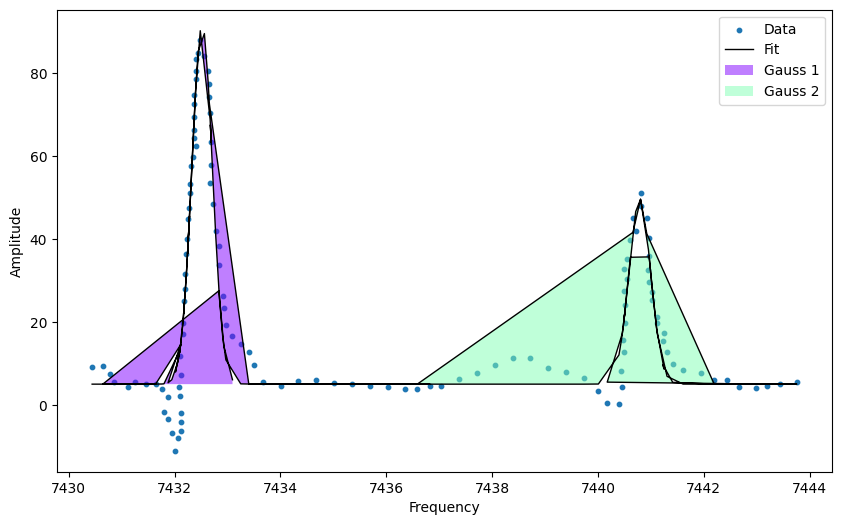

In [19]:
%matplotlib inline
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

# データの読み込み
dataset = pd.read_csv('Te(zy100).csv')
x = dataset['x']
y = dataset['y']

# フィッティング関数の定義
def func(x, *params):
    num_func = int((len(params) - 1) / 3)  # バックグラウンド分を引く
    y_sum = np.zeros_like(x)
    for i in range(num_func):
        amp = params[3 * i]
        ctr = params[3 * i + 1]
        wid = params[3 * i + 2]
        y_sum += amp * np.exp(-((x - ctr) / wid) ** 2)
    y_sum += params[-1]  # バックグラウンドを追加
    return y_sum

# ガウス関数のプロット用関数
def fit_plot(x, *params):
    num_func = int((len(params) - 1) / 3)
    y_list = []
    for i in range(num_func):
        y = np.zeros_like(x)
        amp = params[3 * i]
        ctr = params[3 * i + 1]
        wid = params[3 * i + 2]
        y = amp * np.exp(-((x - ctr) / wid) ** 2)
        y_list.append(y)
    return y_list

# 初期値のリストを作成
guess = [80, 7432, 1, 40, 7440, 1, 1]  # 最後の1はバックグラウンドの初期値

# フィッティング
popt, pcov = curve_fit(func, x, y, p0=guess)

# プロット
plt.figure(figsize=(10, 6))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.scatter(x, y, s=10, label='Data')
fit = func(x, *popt)
plt.plot(x, fit, ls='-', c='black', lw=1, label='Fit')

# 個々のガウス関数をプロット
y_list = fit_plot(x, *popt)
baseline = np.zeros_like(x) + popt[-1]
for n, y_gauss in enumerate(y_list):
    plt.fill_between(x, y_gauss + baseline, baseline, facecolor=cm.rainbow(n / len(y_list)), alpha=0.5, label=f'Gauss {n+1}')

plt.legend()
plt.show()

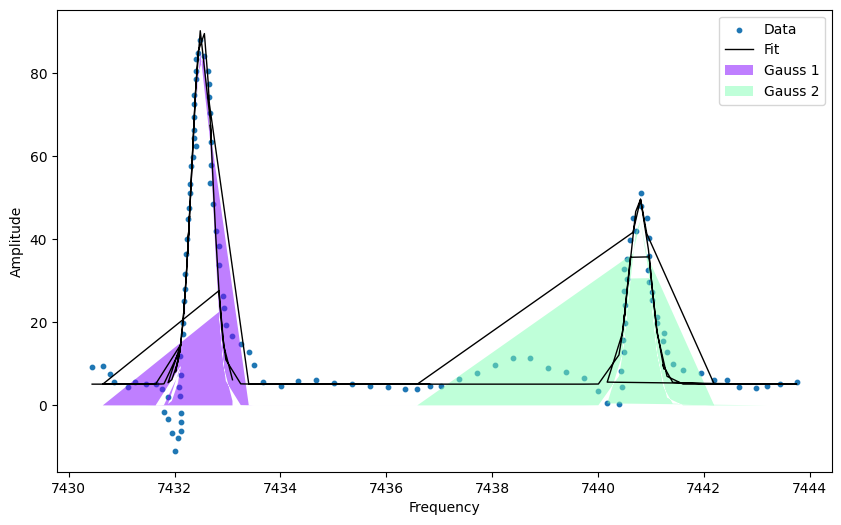

In [20]:
%matplotlib inline
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

# データの読み込み
dataset = pd.read_csv('Te(zy100).csv')
x = dataset['x']
y = dataset['y']

# フィッティング関数の定義
def func(x, *params):
    num_func = int((len(params) - 1) / 3)  # バックグラウンド分を引く
    y_sum = np.zeros_like(x)
    for i in range(num_func):
        amp = params[3 * i]
        ctr = params[3 * i + 1]
        wid = params[3 * i + 2]
        y_sum += amp * np.exp(-((x - ctr) / wid) ** 2)
    y_sum += params[-1]  # バックグラウンドを追加
    return y_sum

# ガウス関数のプロット用関数
def fit_plot(x, *params):
    num_func = int((len(params) - 1) / 3)
    y_list = []
    for i in range(num_func):
        y = np.zeros_like(x)
        amp = params[3 * i]
        ctr = params[3 * i + 1]
        wid = params[3 * i + 2]
        y = amp * np.exp(-((x - ctr) / wid) ** 2)
        y_list.append(y)
    return y_list

# 初期値のリストを作成
guess = [80, 7432, 1, 40, 7440, 1, 1]  # 最後の1はバックグラウンドの初期値

# フィッティング
popt, pcov = curve_fit(func, x, y, p0=guess)

# プロット
plt.figure(figsize=(10, 6))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.scatter(x, y, s=10, label='Data')
fit = func(x, *popt)
plt.plot(x, fit, ls='-', c='black', lw=1, label='Fit')

# 個々のガウス関数をプロット
y_list = fit_plot(x, *popt)
for n, y_gauss in enumerate(y_list):
    plt.fill_between(x, y_gauss, 0, facecolor=cm.rainbow(n / len(y_list)), alpha=0.5, label=f'Gauss {n+1}')

plt.legend()
plt.show()